In [1]:
from epd_plot_shift import *

In [2]:
# Path to the solo data files.
data_path = r'C:/Users/Omistaja/Desktop/SRL/2021SRL/epd_plot-main/solo-loader-main/data/'

# Path to where images and .csv -files will be saved.
image_path = r'C:/Users/Omistaja/Desktop/SRL/2021SRL/epd_plot-main/solo_loader-main-shift/image/'
csv_path = r'C:/Users/Omistaja/Desktop\SRL/2021SRL/epd_plot-main/solo_loader-main-shift/'

In [3]:
# Start and end day. Format: yyyymmdd.
start_date = 20201118
end_date = 20201118


plot_start = '2020-11-18-1200'
plot_end = '2020-11-18-1600'
bg_start = '2020-11-18-1100'
bg_end = '2020-11-18-1230'

t_inj = '2020-11-18-1312'
travel_distance = 1.191
second_slope = 1.7
fixed_window = None
frac_nan_threshold = 0.9  # exclude all spectrum values with fraction of non-nan data points in search period lower than this

# Averaging. 'mean' = rolling mean, 'none' = no averaging.
averaging_mode = 'mean'
averaging = 5

In [4]:
# Toggle individual instruments. For use if for example one instrument doesn't have data yet.
ept = True
het = True
step = True

# Toggles the step masking from Ninas function. No reason to be False.
step_masking = True

In [5]:
# Toggle saving of the images and .csv -files.
saving = True
autodownload_data = True

direction = 'sun'

## STEP

DatetimeIndex(['2020-11-18 00:01:09.309000', '2020-11-18 00:01:19.309000',
               '2020-11-18 00:01:29.309000', '2020-11-18 00:01:39.309000',
               '2020-11-18 00:01:49.309000', '2020-11-18 00:01:59.309000',
               '2020-11-18 00:02:09.309000', '2020-11-18 00:02:19.309000',
               '2020-11-18 00:02:29.309000', '2020-11-18 00:02:39.309000',
               ...
               '2020-11-18 23:59:29.450000', '2020-11-18 23:59:39.450000',
               '2020-11-18 23:59:49.450000', '2020-11-18 23:59:59.450000',
               '2020-11-19 00:00:09.450000', '2020-11-19 00:00:19.450000',
               '2020-11-19 00:00:29.450000', '2020-11-19 00:00:39.450000',
               '2020-11-19 00:00:49.450000', '2020-11-19 00:00:59.450000'],
              dtype='datetime64[ns]', length=8640, freq=None)


C:\Users\Omistaja\Documents\GitHub\epd-load-n-plot\epd_plot_shift.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electron_fluxes[df_electron_fluxes<0] = np.NaN
C:\Users\Omistaja\Anaconda3\lib\site-packages\pandas\core\frame.py:3713: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


[10534800.26273504, 15739530.445830531, 15024137.896715008, 9101450.182814816, 13073295.282099618, 11633198.253428573, 10934678.221931854, 7101256.320144927, 8811875.755705051, 8548510.702810345, 1831139.240625, 2962461.482595238, 3851782.9942656253, 3358097.43046875, 2430760.874866477, 1806543.0576875003, 1590653.7700625, 1156513.548609375, 804340.1772500001, 656899.2641367188, 490728.8051497396, 397326.18793402775, 304882.9150434027, 199831.83143636066, 172997.0785677083, 132514.87692795138, 100071.89187847222, 105673.96713427734, 60986.64860742188, 48762.20157031249, 44911.926422638295, 28749.56141510641, 26982.569847555224, 20116.01038736979, 14340.196150389422, 14063.552793917961, 10779.339154134115, 9206.618763427734, 8482.344006347656, 5271.259498508998, 4802.913106253487, 3779.4506781005857, 3581.2325482597553, 2524.881395947802, 1856.0567202858665, 2118.459234201389, 1392.3808402018228, 1075.4645839525306]


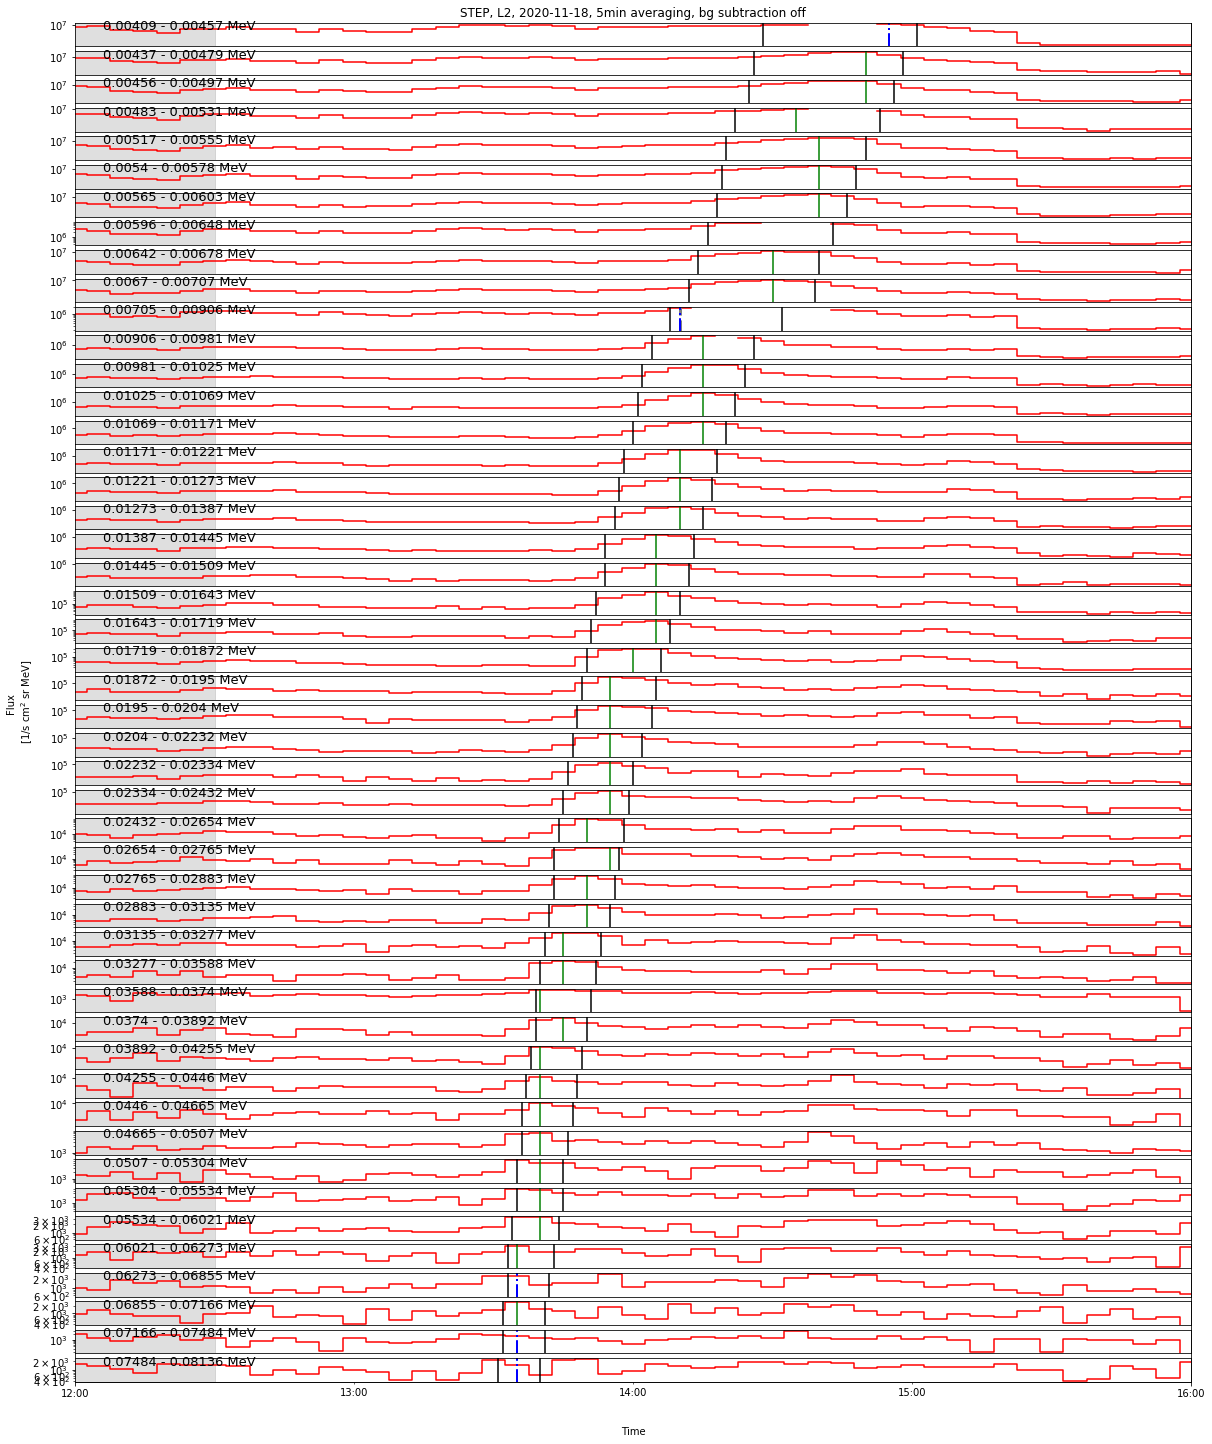

0     1.148725e+07
1     2.004550e+07
2     1.858964e+07
3     9.959042e+06
4     1.631739e+07
5     1.530065e+07
6     1.440472e+07
7     7.248246e+06
8     1.142488e+07
9     1.148937e+07
10    1.831139e+06
11    4.260935e+06
12    5.658367e+06
13    5.222635e+06
14    3.312230e+06
15    2.682236e+06
16    2.405644e+06
17    1.640250e+06
18    1.253657e+06
19    1.054665e+06
20    7.677916e+05
21    5.216017e+05
22    3.188424e+05
23    2.637529e+05
24    2.194128e+05
25    1.866235e+05
26    1.292595e+05
27    1.211721e+05
28    7.423405e+04
29    5.492288e+04
30    6.011540e+04
31    3.584343e+04
32    2.738686e+04
33    2.135384e+04
34    1.627237e+04
35    1.886683e+04
36    1.191534e+04
37    1.139964e+04
38    9.621586e+03
39    7.119107e+03
40    4.974490e+03
41    4.387838e+03
42    3.590732e+03
43    3.282346e+03
44    2.441470e+03
45    2.688400e+03
46    1.619047e+03
47    1.485222e+03
Name: Flux_peak, dtype: float64


C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


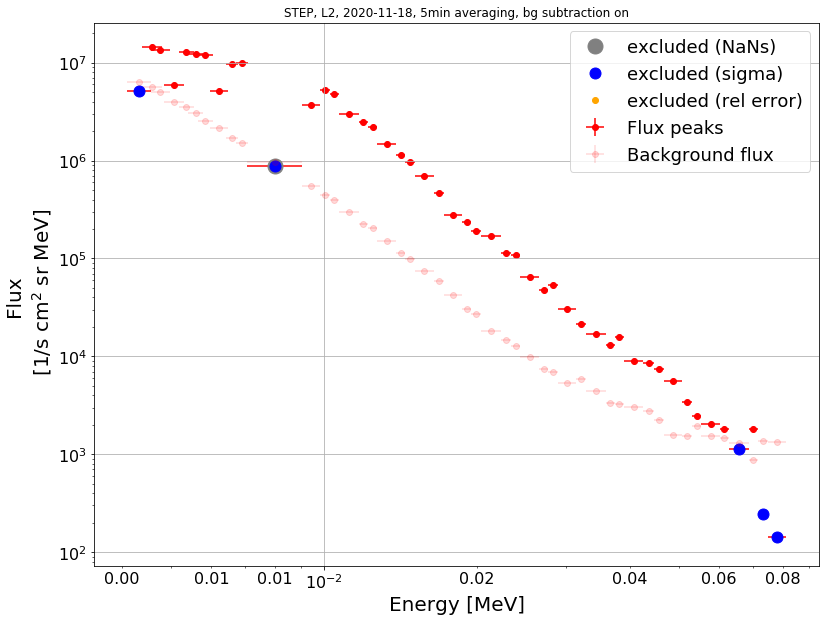

In [6]:
if(step):
    df_particles_step, energies_step = epd_load(sensor='step', viewing='sun', level='l2', startdate=start_date, enddate=end_date, path=data_path, autodownload=True)
    data_step = extract_step_data(df_particles_step, plot_start, plot_end, bg_start, bg_end, t_inj, travel_distance, second_slope, fixed_window, instrument = 'step', data_type = 'l2', averaging_mode=averaging_mode, averaging=averaging, masking=step_masking)
    if saving: write_to_csv(data_step, path=csv_path)
    #for bg_b in [False, True]:
    bg_b = False
    plot_channels(data_step, bg_subtraction=bg_b, path=image_path, savefig=saving)
    bg_b = True
    plot_spectrum_peak(data_step, bg_subtraction=bg_b, path=image_path, savefig=saving)

## EPT

C:\Users\Omistaja\Anaconda3\lib\site-packages\heliopy\data\util.py:849: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{df_key}_{i}'] = data
C:\Users\Omistaja\Anaconda3\lib\site-packages\heliopy\data\util.py:844: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[df_key] = data


[10785.230368637924, 13510.22447973079, 9097.924953239713, 7049.368409259077, 7054.715199497619, 5020.117041706311, 3434.45816089034, 2596.705800135639, 2394.1878068715014, 1549.3878964474366, 955.0269722573308, 825.3227254127592, 537.4881913841054, 292.619315736376, 300.3213045832783, 224.52008462349335, 127.82209810893846, 41.99701506432715, 95.87431148687932, 54.410753750947734, 46.01349427646758, 12.076657752286696, 22.21773029758848, 22.61681250248031, 18.959109440811467, -0.2046343680791681, 8.652390135658683, 7.626574575384372, 11.12101025785917, 14.761611490109802, -0.0012401191216190636, -0.00015589879215742575, -0.011426859023763952, -0.5989985867884273]


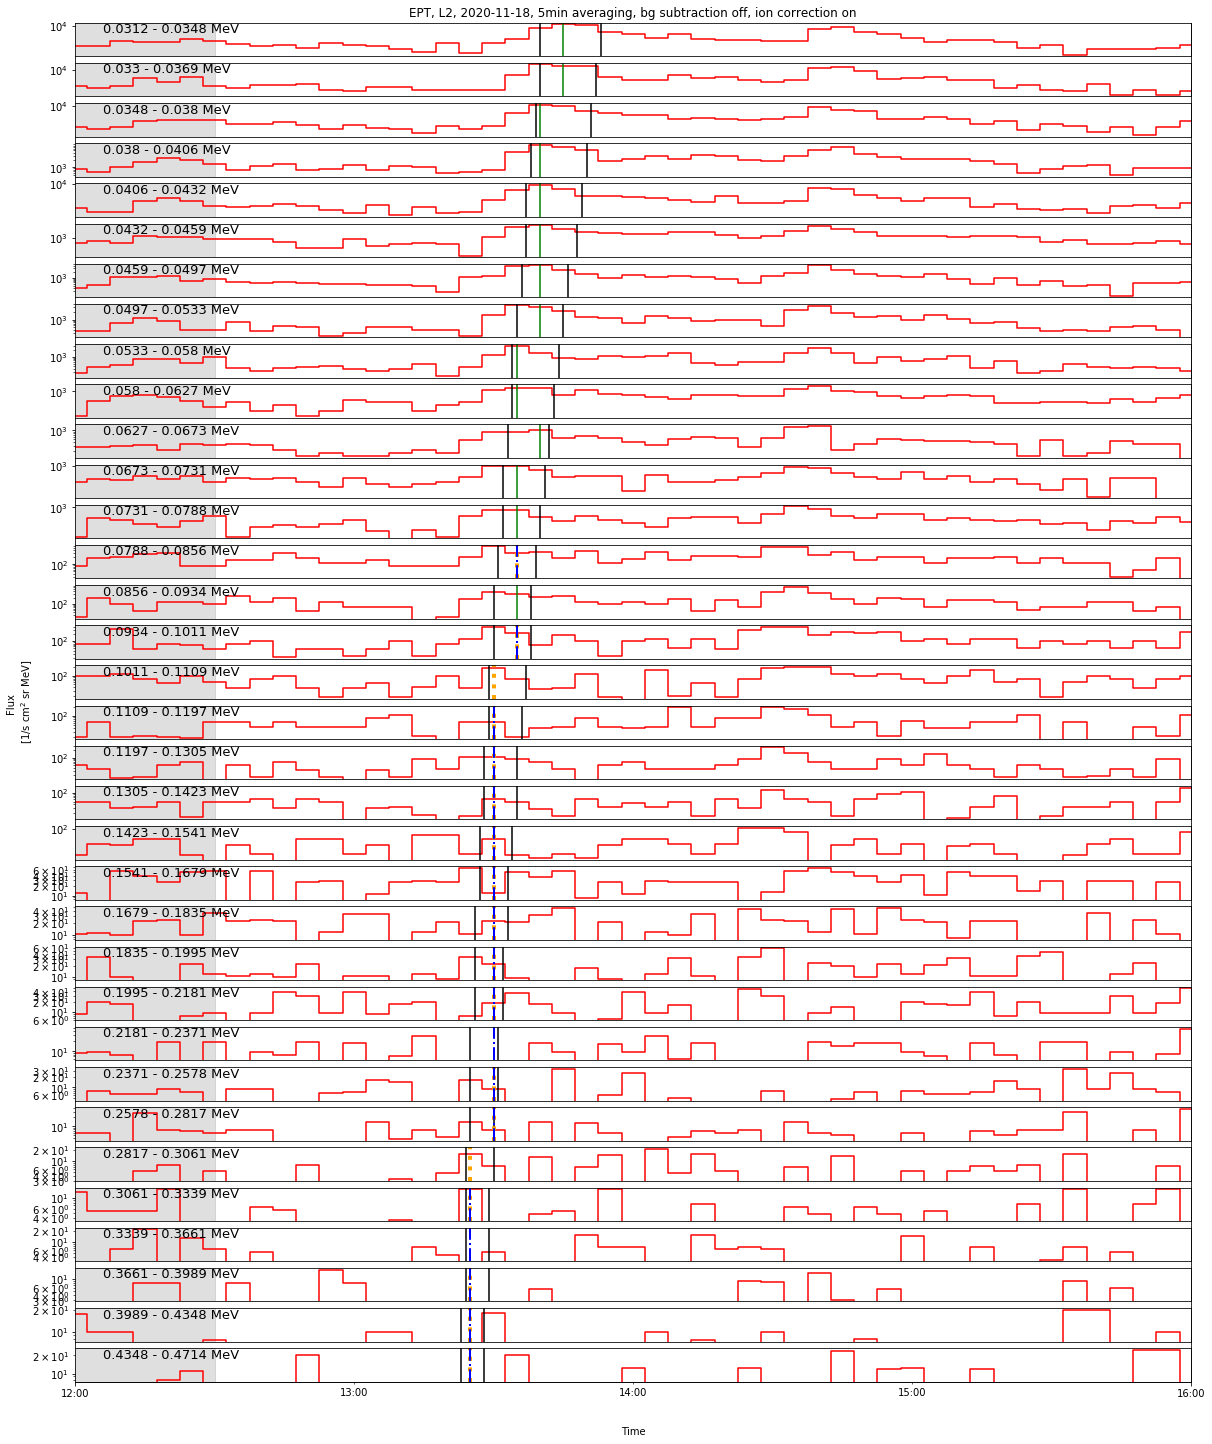

0     11227.851167
1     13741.166237
2     11321.255337
3      8608.386437
4      8588.525758
5      6359.095269
6      4278.217171
7      3068.812893
8      3239.178252
9      1549.780955
10     1041.639769
11      984.364613
12      729.688221
13      292.619316
14      300.321305
15      224.520085
16      177.860828
17       64.023218
18      104.992976
19       62.683428
20       46.013494
21       12.076658
22       22.217730
23       22.616813
24       18.959109
25       -0.204634
26        8.652390
27        7.626575
28       14.883271
29       14.761611
30       -0.001240
31       -0.000156
32       -0.011427
33       -0.598999
Name: Flux_peak, dtype: float64


C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


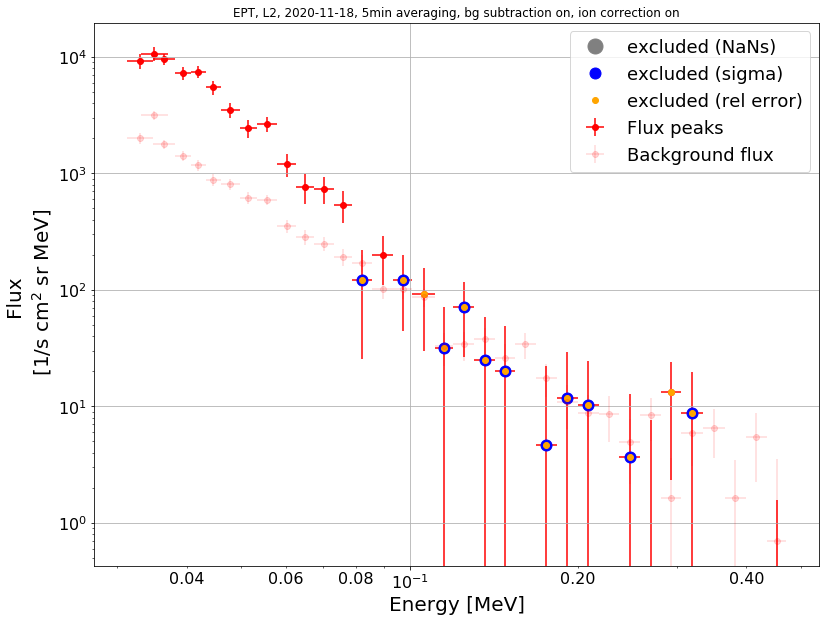

0      8785.217504
1     10360.554417
2      7325.928133
3      5636.130562
4      5881.315723
5      4138.759351
6      2627.983506
7      1983.661193
8      1803.454763
9      1197.278286
10      671.506566
11      576.097060
12      345.670346
13      122.355337
14      198.091728
15      122.308068
16       41.543554
17        9.432284
18       61.883650
19       16.718236
20       19.940681
21      -21.831131
22        4.662770
23       11.748608
24       10.173743
25       -8.851957
26        3.693343
27       -0.744624
28        9.481712
29        8.823478
30       -6.504728
31       -1.627425
32       -5.504866
33       -1.290514
Name: Bg_subtracted_average, dtype: float64


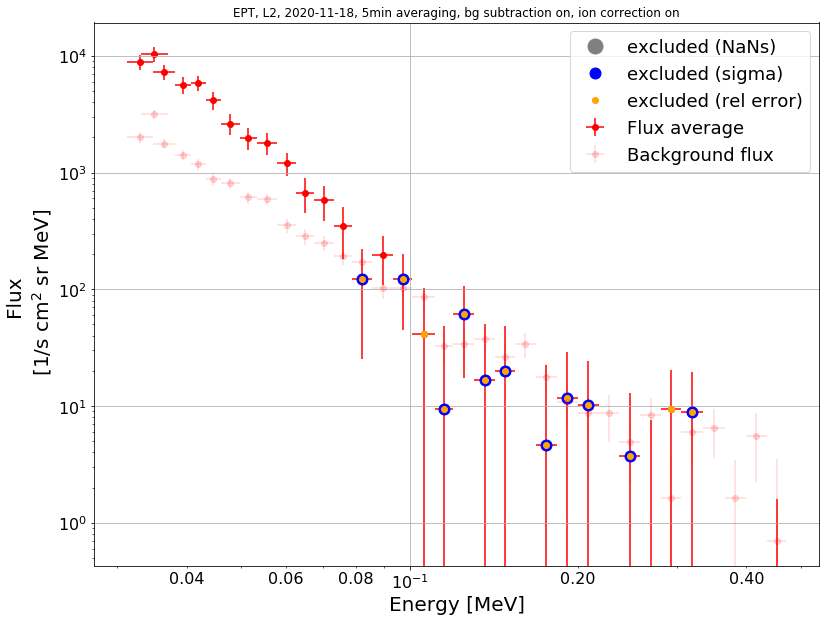

In [7]:
if(ept):
    df_protons_ept, df_electrons_ept, energies_ept = read_epd_cdf('ept', 'sun', 'l2', start_date, end_date, path=data_path, autodownload=True)
    #for ion_b in [False, True]:
    ion_b = True    
    data_ept = extract_data(df_protons_ept, df_electrons_ept, plot_start, plot_end, bg_start, bg_end, t_inj, travel_distance, travel_distance_second_slope=second_slope, fixed_window=None, instrument = 'ept', data_type = 'l2', averaging_mode=averaging_mode, averaging=averaging, masking=step_masking, ion_conta_corr=ion_b)
    if saving: write_to_csv(data_ept, path=csv_path)
    #for bg_b in [False, True]:
    bg_b = False
    plot_channels(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving, frac_nan_threshold=frac_nan_threshold, rel_err_threshold=0.5)
    bg_b = True
    plot_spectrum_peak(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving, frac_nan_threshold=frac_nan_threshold) 
    plot_spectrum_average(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving, frac_nan_threshold=frac_nan_threshold)      

## HET

C:\Users\Omistaja\Anaconda3\lib\site-packages\heliopy\data\util.py:849: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{df_key}_{i}'] = data
C:\Users\Omistaja\Anaconda3\lib\site-packages\heliopy\data\util.py:844: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[df_key] = data


[0.0, 0.04300520196557045, 0.004663256928324699, 0.003934334497898817]


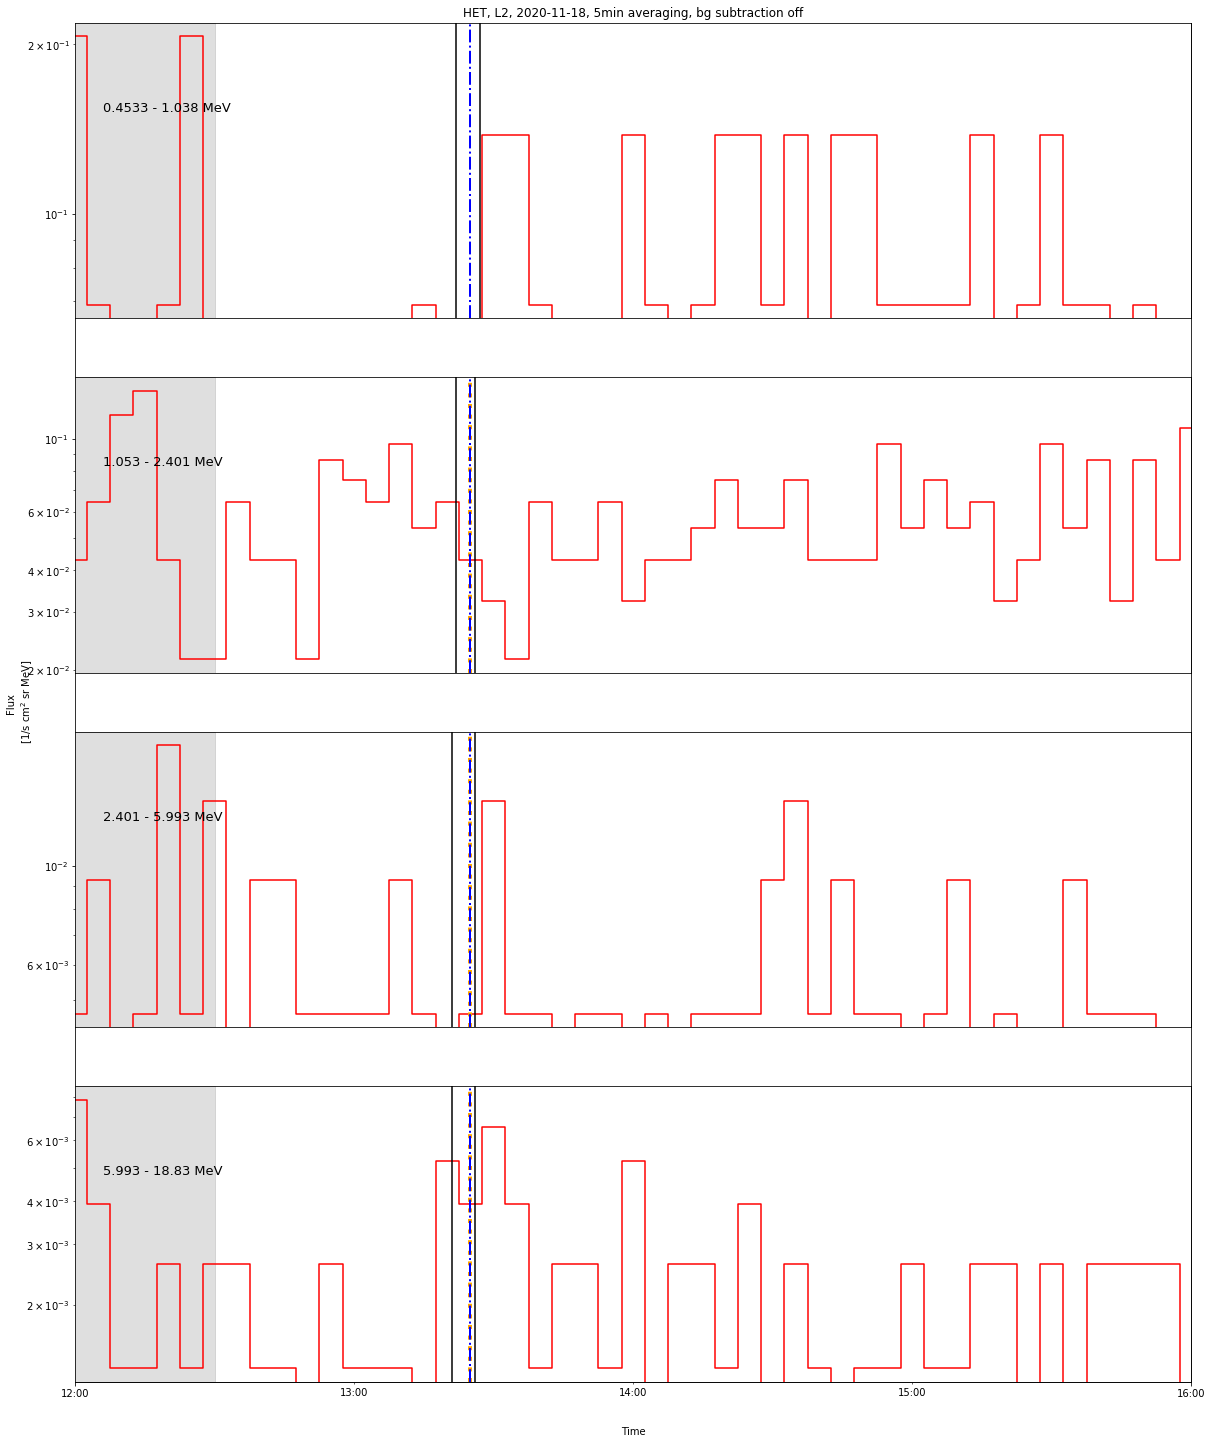

0    0.000000
1    0.043005
2    0.004663
3    0.003934
Name: Flux_peak, dtype: float64


C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


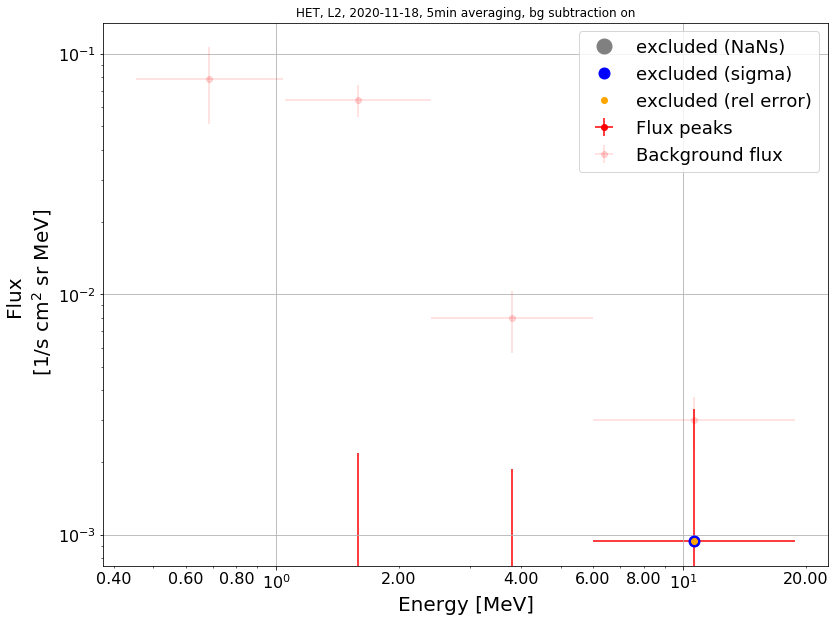

In [8]:
if(het):
    df_protons_het, df_electrons_het, energies_het = read_epd_cdf('het', 'sun', 'l2', start_date, end_date, path=data_path, autodownload=True)
    data_het = extract_data(df_protons_het, df_electrons_het, plot_start, plot_end, bg_start, bg_end, t_inj, travel_distance, second_slope, fixed_window, instrument='het', data_type='l2', averaging_mode=averaging_mode, averaging=averaging)
    if saving: write_to_csv(data_het, path=csv_path)
    #for bg_b in [False, True]:
    bg_b = False    
    plot_channels(data_het, bg_subtraction=bg_b, path=image_path, savefig=saving)
    bg_b = True
    plot_spectrum_peak(data_het, bg_subtraction=bg_b, path=image_path, savefig=saving)